In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('logistic_regression_model.pkl', 'rb') as f:
    logistic_regression_model = pickle.load(f)

In [3]:
with open('tuned_xgboost_model.pkl', 'rb') as f:
    xgboost_tuned = pickle.load(f)

In [4]:
with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

In [5]:
with open('best_knn_model.pkl', 'rb') as f:
    knn_model = pickle.load(f)

C:\Users\Nath\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.4.1.post1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
from sklearn.ensemble import VotingClassifier

In [7]:
classifiers = [('Logistic Regression', logistic_regression_model),
               ('XGBoost', xgboost_tuned),
               ('SVM', svm_model),
               ('KNN', knn_model)]

voting_classifier = VotingClassifier(estimators=classifiers, voting='hard')

In [8]:
df = pd.read_csv('./Complete-data.csv')

X = df.drop(columns=['Landslide'])
y = df['Landslide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
voting_classifier.fit(X_train, y_train)
predictions = voting_classifier.predict(X_test)

In [10]:
voting_predictions = voting_classifier.predict(X_test)

# Calculate metrics for the Voting Classifier
print("Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, voting_predictions))
print("MCC:", matthews_corrcoef(y_test, voting_predictions))
print("Classification Report:")
print(classification_report(y_test, voting_predictions))

Voting Classifier Metrics:
Accuracy: 0.8024691358024691
MCC: 0.6123337804564415
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       138
           1       0.73      0.86      0.79       105

    accuracy                           0.80       243
   macro avg       0.80      0.81      0.80       243
weighted avg       0.81      0.80      0.80       243



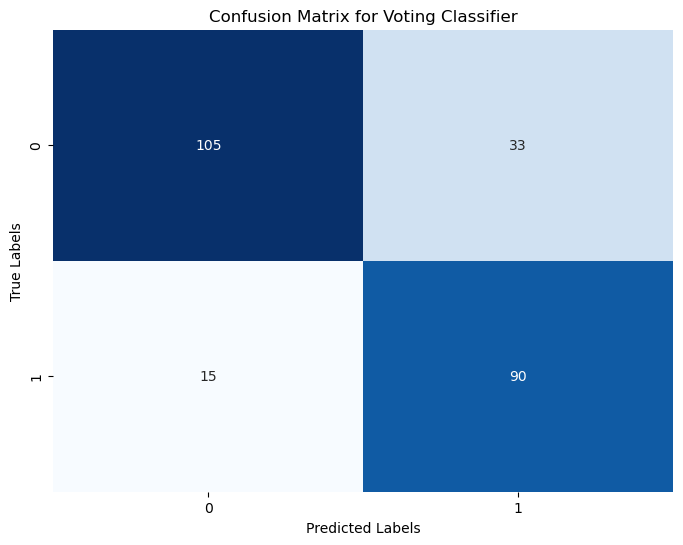

In [11]:
conf_matrix = confusion_matrix(y_test, voting_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Voting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig('VotingClassifierCM.png')
plt.show()

In [12]:
models = [logistic_regression_model, xgboost_tuned, svm_model, knn_model]
model_names = ['Logistic Regression', 'XGBoost', 'SVM', 'KNN']

for model, name in zip(models, model_names):
    model_predictions = model.predict(X_test)

    print(f"\nMetrics for {name}:")
    print("Accuracy:", accuracy_score(y_test, model_predictions))
    print("MCC:", matthews_corrcoef(y_test, model_predictions))
    print("Classification Report:")
    print(classification_report(y_test, model_predictions))


Metrics for Logistic Regression:
Accuracy: 0.7242798353909465
MCC: 0.4533219363491529
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       138
           1       0.66      0.76      0.70       105

    accuracy                           0.72       243
   macro avg       0.72      0.73      0.72       243
weighted avg       0.73      0.72      0.73       243


Metrics for XGBoost:
Accuracy: 0.8353909465020576
MCC: 0.676495812705659
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       138
           1       0.77      0.89      0.82       105

    accuracy                           0.84       243
   macro avg       0.84      0.84      0.83       243
weighted avg       0.84      0.84      0.84       243


Metrics for SVM:
Accuracy: 0.7901234567901234
MCC: 0.5938561366683022
Classification Report:
              precision    recall  f1-score  

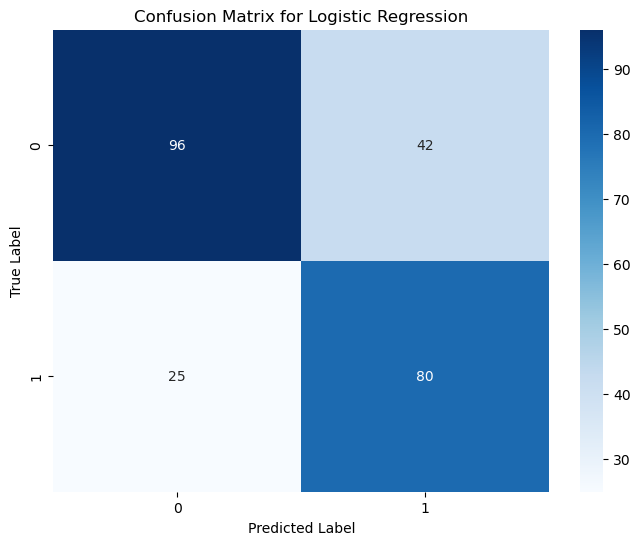

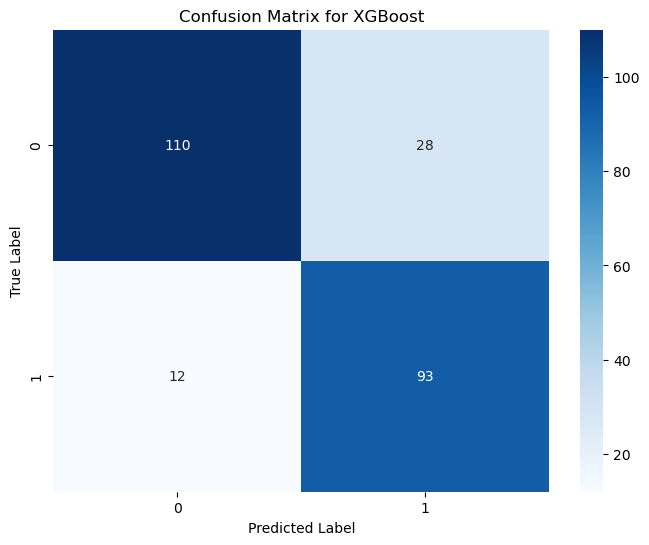

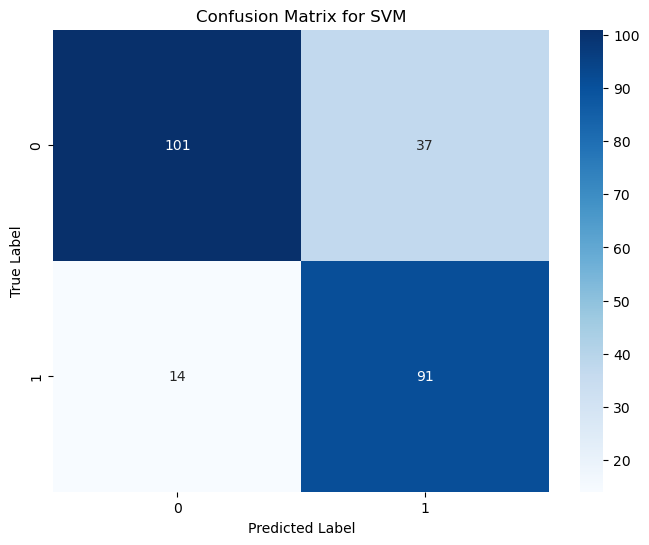

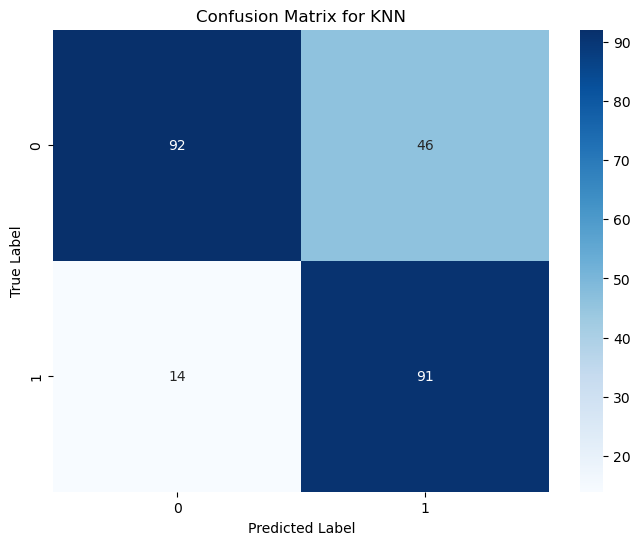

In [13]:
for model, name in zip(models, model_names):
    model_predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, model_predictions)
    
    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(f"confusion_matrix_{name}.png")  # Save the confusion matrix plot
    plt.show()